In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
housing = pd.read_csv("ML Housing project.csv")

In [5]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
#This gives us the statistics of the columns that are possible
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#this allows us to plot a histogram of all the columns present in the data set togetor
#housing.hist(bins = 50, figsize = (20,10))
#plt.show()

## Train-Test Splitting

In [8]:
from sklearn.model_selection import train_test_split
#This function helps us to spli data randomly. It takes in the data set, percentage for test data, and random state which is just convention at this point
train_set, test_set = train_test_split(housing,test_size = 0.2, random_state=42)


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit #This methodically shuffles data based on the ratio of one important variable
split = StratifiedShuffleSplit(n_splits=5 , test_size=0.2, random_state=42) #This takes in the number of splits, test size and seed
for train_index, test_index in split.split(housing, housing["CHAS"]): #This is a sum over all the indices that it has saparated for training and testing
    strat_train_set = housing.loc[train_index] #Here I am telling it to create a new data set based on the training indices
    strat_test_set = housing.loc[test_index] #Here I am telling it to create a new data set based on the testing indices

In [10]:
strat_train_set['CHAS'].value_counts() # I am checking the rarios of the CHAS variable to all data in the train test set, which is now the same

0    376
1     28
Name: CHAS, dtype: int64

In [11]:
strat_test_set["CHAS"].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [12]:
housing = strat_train_set #This Step is very important because after we have the training data, we only use that for all our further analyses and keep
#the testing data for testing purposes only

## Looking for Correlations

In [13]:
#Here we form a correlations matrix which allows us to find the correlation b/w different functions
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False) #This will show me the correlation of all variables with MEDV (price) sorted in descending order

MEDV       1.000000
RM         0.717287
ZN         0.331983
B          0.312481
DIS        0.239204
CHAS       0.169625
RAD       -0.360931
AGE       -0.362472
CRIM      -0.389661
NOX       -0.419263
TAX       -0.445126
INDUS     -0.458958
PTRATIO   -0.476419
LSTAT     -0.736789
Name: MEDV, dtype: float64

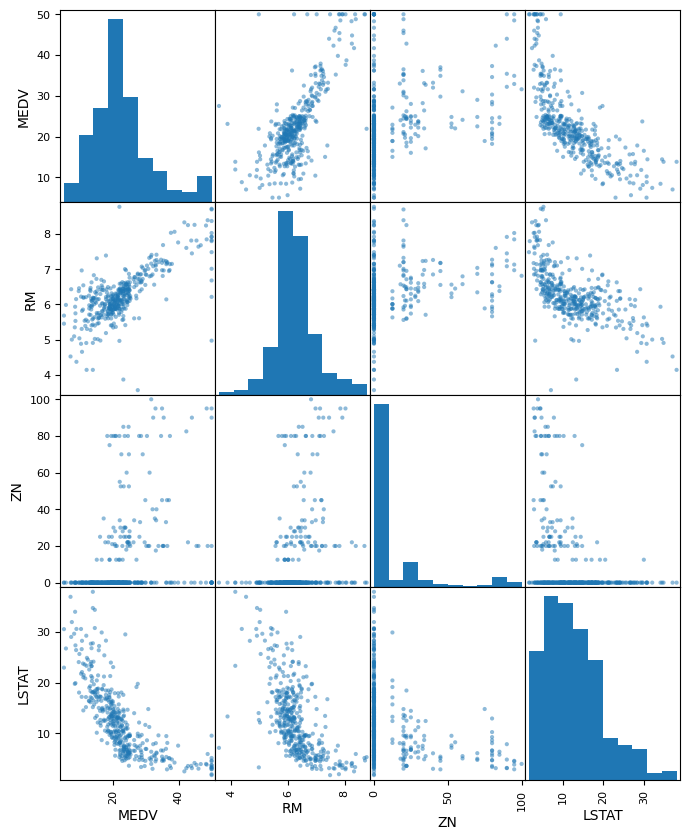

In [14]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV',"RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (8,10))
plt.show()

In [28]:
# Now when we create a machine learning model we would like to drop the last column which is our label and keep only our features in the data where machine will learn
housing = strat_train_set.drop("MEDV",axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

257    50.0
429     9.5
326    23.0
214    23.7
430    14.5
       ... 
107    20.4
44     21.2
60     18.7
176    23.2
109    19.4
Name: MEDV, Length: 404, dtype: float64

Now one thing that we could do after this step is get rid of the data points that seem like outliers but the tutorial doesnt do it so neither will I.

## Scikit Learn Design

Scikit learn offers three major kinds of methods.
1. Estimators - These estimate some values of the data. For example creating the median aur mean and then these can also replace the data with the missing values. Example = imputer 

2. Transformers = These transform the data. For example, scaling functions such as standardization can transform the data after scaling the features.

3. Predictors = These predict the data. e.g linear model and k nearest neighbors

## Scaling Features

There are two basic scaling functions.
1. Normalization = value-min/ max-min
2. Standardization = value - mean / std
Both of these are actually used to scale the feature values closer together for our machine learning models to work better.

## Creating a pipeline

We should always create a pipeline. That is a set of things that happens to the data before it is ready to go into the form readable by predictors and machine learning models. This includes replacing missing values using imputers and rescalling the variables using standard scaling.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline([
    ("imputer" , SimpleImputer(strategy= "median")),
    ("Standard Scaler" , StandardScaler()),
])

In [30]:
num_housing = my_pipeline.fit_transform(housing)

In [34]:
num_housing # See that it now return data in a format readable by machine learning predictors

array([[-0.35019336,  0.38526578, -1.06399886, ..., -2.52197707,
         0.35027449, -1.0562825 ],
       [ 0.66672314, -0.47371532,  0.99465718, ...,  0.81860895,
        -3.57897454,  1.60780982],
       [-0.38608988, -0.47371532, -0.56718236, ...,  0.54022678,
         0.43626936, -0.91155597],
       ...,
       [-0.40405154,  0.60001105, -0.89499384, ...,  0.58662381,
         0.41489008,  0.07202242],
       [-0.41326832, -0.47371532, -1.05234334, ..., -0.85168406,
         0.39243586, -0.35513162],
       [-0.39073206, -0.47371532, -0.39526346, ...,  1.14338815,
         0.3685484 ,  0.4092493 ]])

## Deploying A Machine Learning Model

In [80]:
#lets import various models to try on our data
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(num_housing,housing_labels)

RandomForestRegressor()

In [81]:
#Now lets take some data to get a feel of the predictions
some_data = housing.iloc[:5]
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
257,0.61154,20.0,3.97,0,0.647,8.704,86.9,1.8010,5,264,13.0,389.70,5.12
429,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666,20.2,60.72,24.08
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
214,0.28955,0.0,10.59,0,0.489,5.412,9.8,3.5875,4,277,18.6,348.93,29.55
430,8.49213,0.0,18.10,0,0.584,6.348,86.1,2.0527,24,666,20.2,83.45,17.64


In [82]:
some_labels = housing_labels.iloc[:5]
some_labels

257    50.0
429     9.5
326    23.0
214    23.7
430    14.5
Name: MEDV, dtype: float64

In [83]:
#using these values lets see how our model works, but first we must preprocess this data
some_preprocessed_data = my_pipeline.fit_transform(some_data)

In [84]:
model.predict(some_preprocessed_data)

array([45.9  , 12.468, 22.86 , 21.095, 21.052])

In [85]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(num_housing)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [86]:
print(rmse)

1.3135181124305704


Using decision trees we are getting zero error which is too good to be true. thus we use a better evaluation measure called "Cross Validation".

## Cross Validation

It divides the data into groups and using different combination of groups it computes the errors

In [87]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, num_housing, housing_labels, scoring="neg_mean_squared_error",cv =  10) #model, then data, then labels, scoring technique, groups
rmse_scores = np.sqrt(-scores) #The results are negative

In [88]:
print(rmse_scores) #So now we see that its not all fine and dandy even with decision trees

[3.37442715 3.33074792 2.78415654 3.21451416 3.45284747 3.83711592
 6.32052856 2.20739556 2.15098542 3.10585323]


In [89]:
scores

array([-11.38675861, -11.09388168,  -7.75152763, -10.33310129,
       -11.92215563, -14.72345857, -39.94908128,  -4.87259518,
        -4.62673827,  -9.64632427])

In [90]:
def print_useful_score_info(score_data): #Creating a function that displays useful data from scores
    print("Scores =", score_data)
    print("Mean of scores data", np.mean(score_data))
    print("Std of scores =", np.std(score_data))


In [91]:
print_useful_score_info(rmse_scores)

Scores = [3.37442715 3.33074792 2.78415654 3.21451416 3.45284747 3.83711592
 6.32052856 2.20739556 2.15098542 3.10585323]
Mean of scores data 3.377857192596406
Std of scores = 1.1048271486417884


## Conclusion

Random Forest is working the best, therefore we choose this model and deploy it. We have offically solved the problem. Now we could make it accessible to the team and other people but that we will be for another day.